<h1>Thực hành câu 5

<h2>Hãy thực hiện lại bài tập lập trình ở phần hướng dẫn chung nhưng thay
đổi các yêu cầu thành:


<h3>Đọc dữ liệu và xem thông tin dữ liệu

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [2]:
df = pd.read_excel("E:\\IS252\\Lab2\ThucHanh_Cau5\\Online Retail.xlsx")

In [3]:
df.head(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df['Description']=df['Description'].str.strip() 
df.dropna(axis=0,subset=['InvoiceNo'],inplace=True)
df['InvoiceNo']=df['InvoiceNo'].astype('str')

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
#Xóa những hóa đơn tín dụng
df[df.InvoiceNo.str.contains('C',na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [8]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [9]:
df[df.InvoiceNo.str.contains('C',na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


<AxesSubplot:>

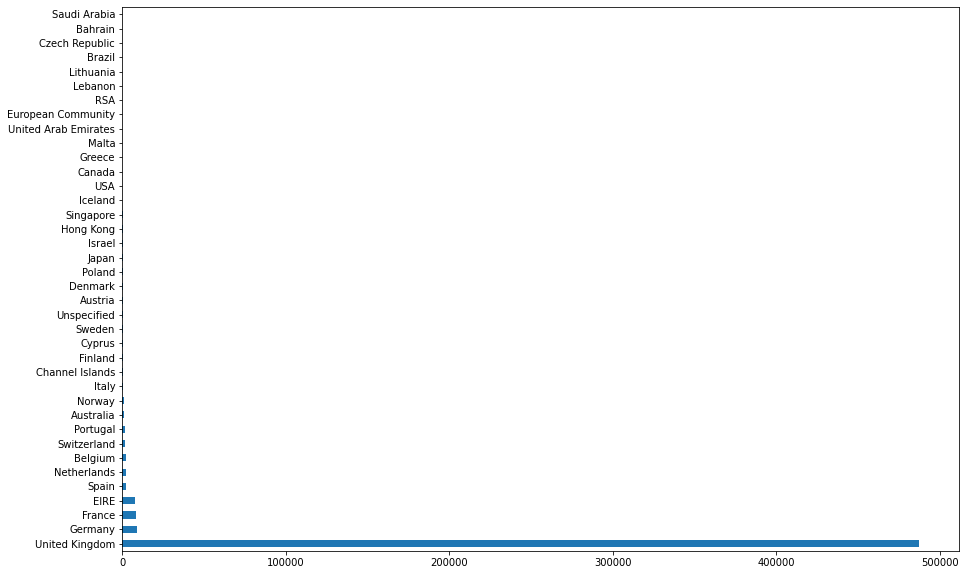

In [10]:
#Thống kê số dòng theo từng quốc gia
df['Country'].value_counts().plot(kind='barh',figsize=(15,10))

<h3>a)	Nước Đức ‘Germany’, min_sup = 5% và min_conf = 50%.

In [11]:
#Lấy những dữ liệu nước 'Germany', Group by: "InvoiceNo","Discription","Quantity"
basket = df[df['Country']=="Germany"].groupby(['InvoiceNo','Description'])['Quantity']

In [12]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Tạo hàm biến đổi dữ liệu có số lượng (Quantity) lớn hơn 0 thì thành 1
def encode_data(datapoint):
    if(datapoint)<=0:
        return 0
    if(datapoint)>=1:
        return 1

In [14]:
basket = basket.applymap(encode_data)

In [15]:
#Xóa cột 'POSTAGE'
basket.drop('POSTAGE',inplace=True,axis=1)

In [16]:
#Dùng toán Apriori
itemset = apriori(basket,min_support=0.05,use_colnames=True)

In [17]:
itemset.head(10)

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [18]:
#Tạo luật kết hợp
rules = association_rules(itemset,metric="confidence",min_threshold=0.5)

In [19]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
dtypes: float64(7), object(2)
memory usage: 704.0+ bytes


In [20]:
rules["antecedents"]=rules["antecedents"].apply(lambda x:list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x:list(x)[0]).astype("unicode")

In [21]:
# Viết lệnh in ra luật
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],"==>",rules.loc[i,'consequents'],'[',rules.loc[i,'support'],',',rules.loc[i,'support'],']')

PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 , 0.06783369803063458 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 , 0.061269146608315096 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 , 0.07439824945295405 ]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [ 0.05908096280087528 , 0.05908096280087528 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 , 0.13129102844638948 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 , 0.13129102844638948 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 , 0.0700218818380744 ]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 , 0.06345733041575492 ]


In [22]:
# Lấy giá trị độ hỗ trợ và độ tin cậy của uật
support = rules['support'].values
confidence = rules['confidence'].values

<AxesSubplot:title={'center':'Assocation Rules'}, xlabel='support', ylabel='confidence'>

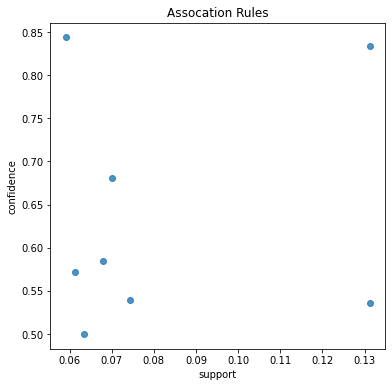

In [23]:
plt.figure(figsize=(6,6))
plt.title('Assocation Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence, fit_reg=False)

<p>Kết luận: Hai thuộc tính không tương quan

In [24]:
# Thực hiện bằng thuật toán FPGrowth
itemsets = fpgrowth(basket, min_support=0.05, use_colnames=True)

In [25]:
rules = association_rules(itemset,metric="confidence",min_threshold=0.5)

In [26]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
dtypes: float64(7), object(2)
memory usage: 704.0+ bytes


In [27]:
rules["antecedents"]=rules["antecedents"].apply(lambda x:list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x:list(x)[0]).astype("unicode")

In [28]:
# Viết lệnh in ra luật
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],"==>",rules.loc[i,'consequents'],'[',rules.loc[i,'support'],',',rules.loc[i,'support'],']')

PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 , 0.06783369803063458 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 , 0.061269146608315096 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 , 0.07439824945295405 ]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [ 0.05908096280087528 , 0.05908096280087528 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 , 0.13129102844638948 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 , 0.13129102844638948 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 , 0.0700218818380744 ]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 , 0.06345733041575492 ]


In [29]:
support = rules['support'].values
confidence = rules['confidence'].values

<AxesSubplot:title={'center':'Assocation Rules'}, xlabel='support', ylabel='confidence'>

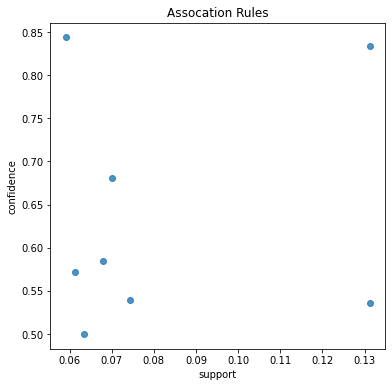

In [30]:
plt.figure(figsize=(6,6))
plt.title('Assocation Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence, fit_reg=False)

<p>Hai thuộc tính này không tương quan

<h3>b)	Nước Pháp ‘France’, min_sup = 7% và min_conf = 70%.

In [11]:
#Lấy những dữ liệu nước 'France', Group by: "InvoiceNo","Discription","Quantity"
basket = df[df['Country']=="France"].groupby(['InvoiceNo','Description'])['Quantity']

In [12]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Tạo hàm biến đổi dữ liệu có số lượng (Quantity) lớn hơn 0 thì thành 1
def encode_data(datapoint):
    if(datapoint)<=0:
        return 0
    if(datapoint)>=1:
        return 1

In [14]:
basket = basket.applymap(encode_data)

In [15]:
#Xóa cột 'POSTAGE'
basket.drop('POSTAGE',inplace=True,axis=1)

In [16]:
#Dùng toán Apriori
itemset = apriori(basket,min_support=0.07,use_colnames=True)

In [17]:
itemset.head(10)

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [18]:
#Tạo luật kết hợp
rules = association_rules(itemset,metric="confidence",min_threshold=0.7)

In [19]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
dtypes: float64(7), object(2)
memory usage: 704.0+ bytes


In [20]:
rules["antecedents"]=rules["antecedents"].apply(lambda x:list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x:list(x)[0]).astype("unicode")

In [21]:
# Viết lệnh in ra luật
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],"==>",rules.loc[i,'consequents'],'[',rules.loc[i,'support'],',',rules.loc[i,'support'],']')

PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 , 0.06783369803063458 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 , 0.061269146608315096 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 , 0.07439824945295405 ]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [ 0.05908096280087528 , 0.05908096280087528 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 , 0.13129102844638948 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 , 0.13129102844638948 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 , 0.0700218818380744 ]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 , 0.06345733041575492 ]


In [22]:
# Lấy giá trị độ hỗ trợ và độ tin cậy của uật
support = rules['support'].values
confidence = rules['confidence'].values

<AxesSubplot:title={'center':'Assocation Rules'}, xlabel='support', ylabel='confidence'>

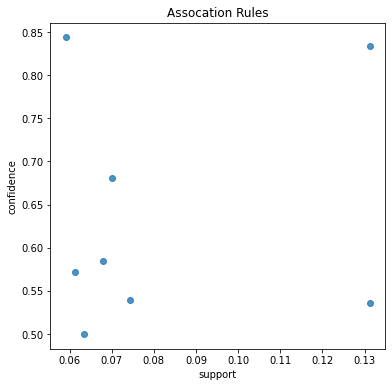

In [23]:
plt.figure(figsize=(6,6))
plt.title('Assocation Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence, fit_reg=False)

<p>Kết luận: Hai thuộc tính không tương quan

In [24]:
# Thực hiện bằng thuật toán FPGrowth
itemsets = fpgrowth(basket, min_support=0.07, use_colnames=True)

In [25]:
rules = association_rules(itemset,metric="confidence",min_threshold=0.7)

In [26]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
dtypes: float64(7), object(2)
memory usage: 704.0+ bytes


In [27]:
rules["antecedents"]=rules["antecedents"].apply(lambda x:list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x:list(x)[0]).astype("unicode")

In [28]:
# Viết lệnh in ra luật
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],"==>",rules.loc[i,'consequents'],'[',rules.loc[i,'support'],',',rules.loc[i,'support'],']')

PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 , 0.06783369803063458 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 , 0.061269146608315096 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 , 0.07439824945295405 ]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [ 0.05908096280087528 , 0.05908096280087528 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 , 0.13129102844638948 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 , 0.13129102844638948 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 , 0.0700218818380744 ]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 , 0.06345733041575492 ]


In [29]:
support = rules['support'].values
confidence = rules['confidence'].values

<AxesSubplot:title={'center':'Assocation Rules'}, xlabel='support', ylabel='confidence'>

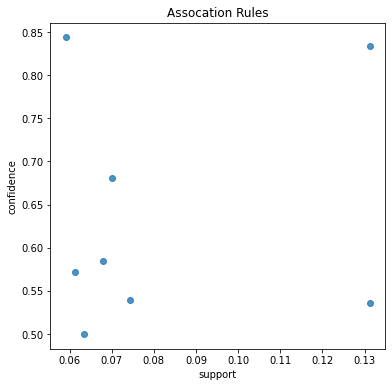

In [30]:
plt.figure(figsize=(6,6))
plt.title('Assocation Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence, fit_reg=False)

<p>Hai thuộc tính này không tương quan